# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка

## Постановка задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка. 

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время. 

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов. 

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Для начала импортируем библиотеки, которые нам понадобятся:

In [199]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from matplotlib.ticker import PercentFormatter
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных
from sklearn.linear_model import LogisticRegression
from scipy import stats
from scipy.stats import skew, boxcox

%matplotlib inline



Итак, прочитаем нашу таблицу:

In [200]:
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Практика: логистическая регрессия

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9:

### Задание 5.0 (не оценивается)

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные. 

**Совет:** воспользуйтесь кодом, который вы писали, выполняя задания в модуле «PYTHON-13. Визуализация данных».

In [201]:
churn_data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


1. Распределение целевого признака Exited:
Exited
0    7963
1    2037
Name: count, dtype: int64
Процент ушедших клиентов: 20.37%


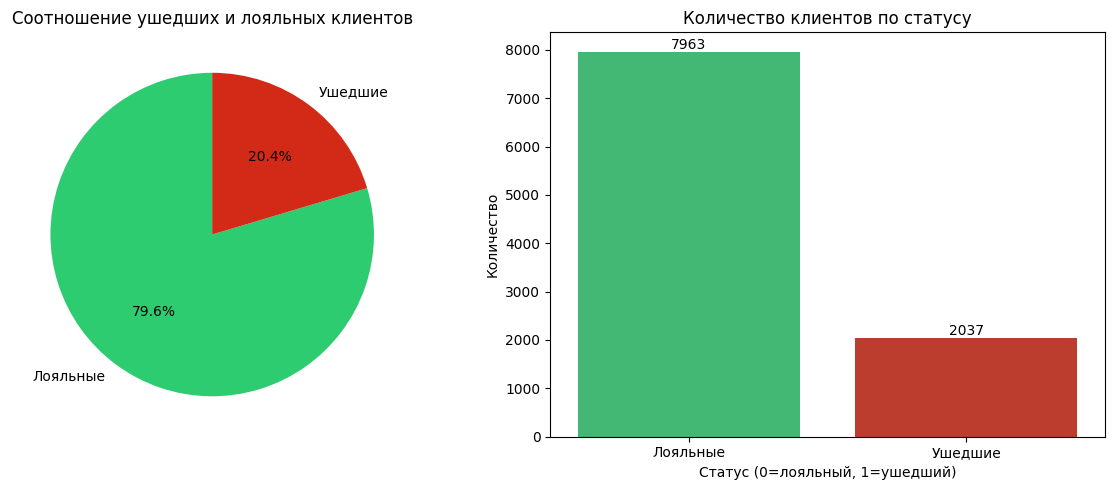



2. Анализ баланса клиентов:


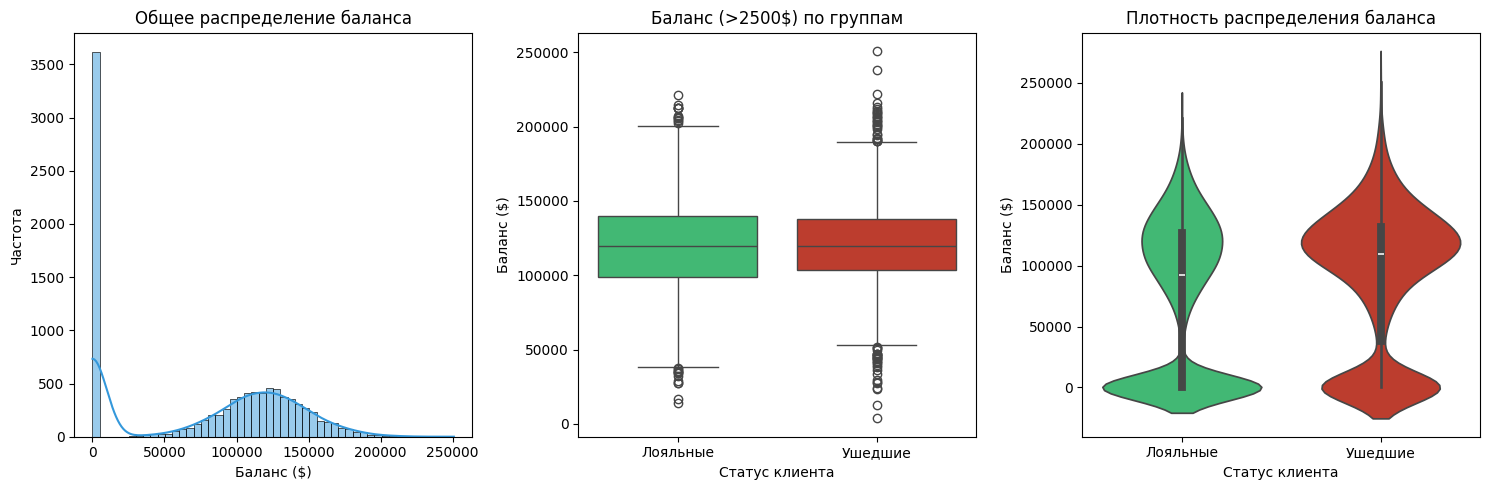

Медиана баланса: $97,199
Средний баланс: $76,486
Баланс ушедших: $91,109
Баланс лояльных: $72,745


3. Анализ возраста клиентов:


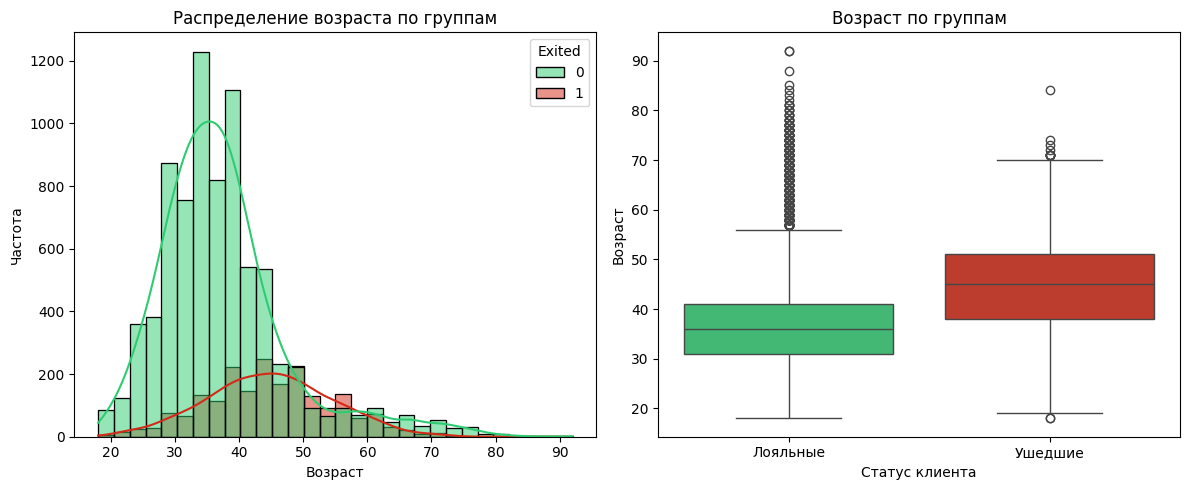

Средний возраст: 38.9 лет
Возраст ушедших: 44.8 лет
Возраст лояльных: 37.4 лет


4. Анализ оттока по полу:


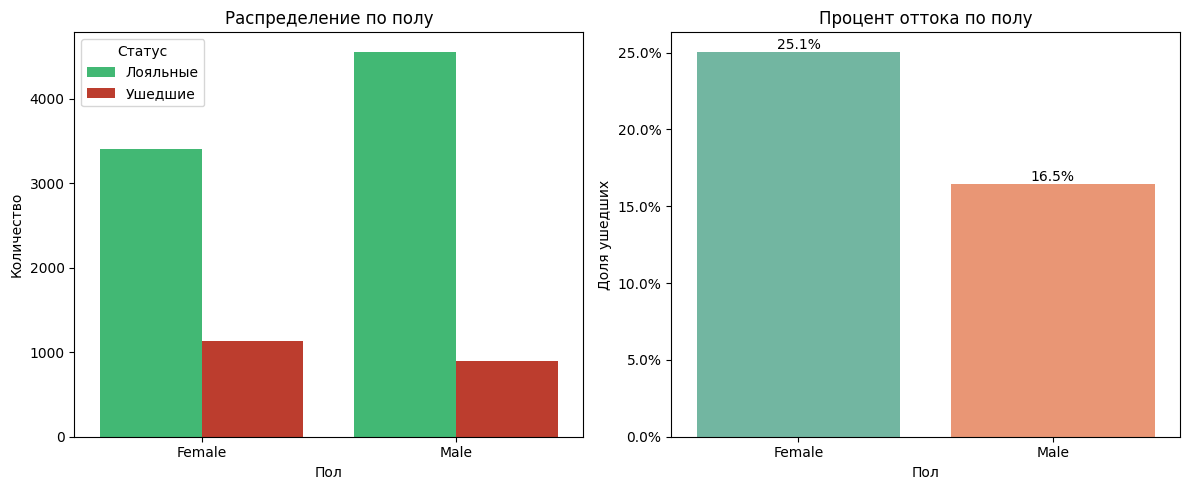



5. Анализ оттока по количеству продуктов:


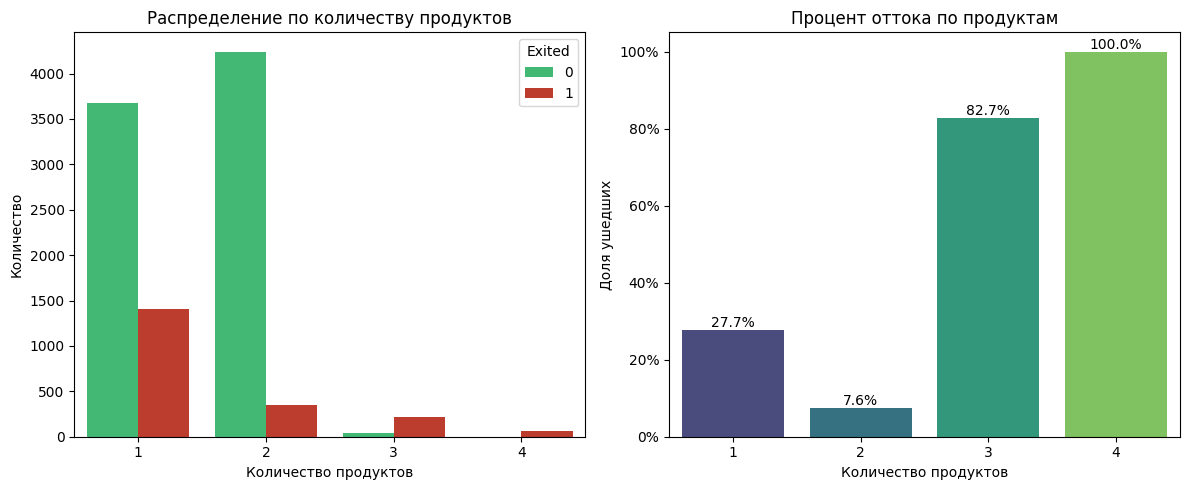



6. Анализ оттока по активности:


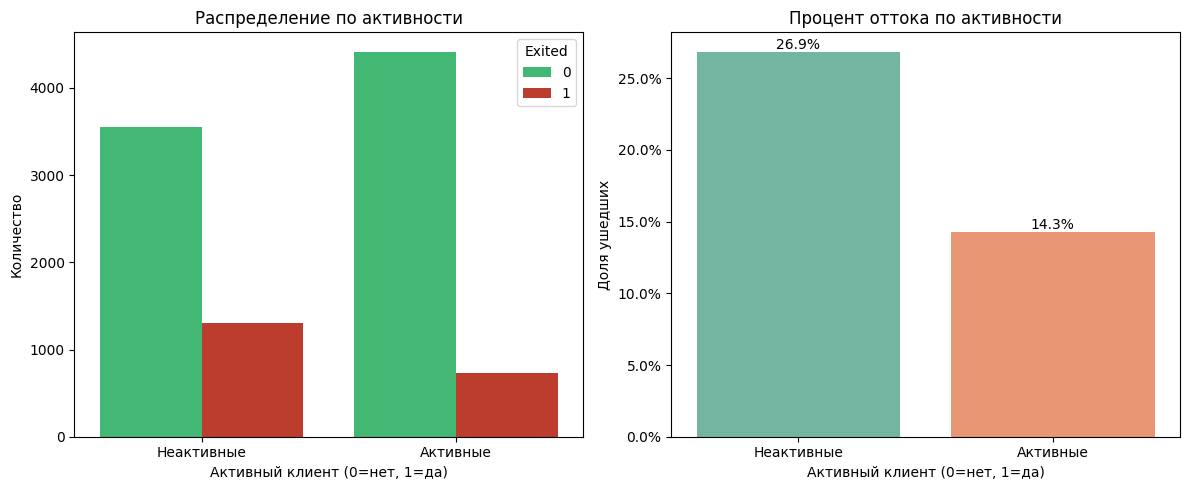



7. Анализ оттока по странам:


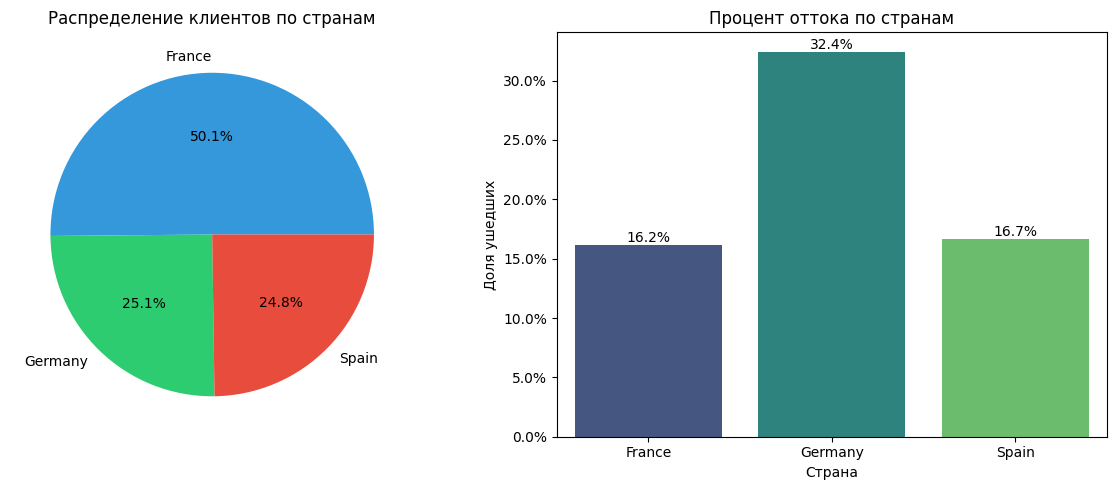



8. Сводная статистика по группам:
         Balance               Age        CreditScore        EstimatedSalary  \
            mean     median   mean median        mean median            mean   
Exited                                                                         
0       72745.30   92072.68  37.41   36.0      651.85  653.0        99738.39   
1       91108.54  109349.29  44.84   45.0      645.35  646.0       101465.68   

                   
           median  
Exited             
0        99645.04  
1       102460.84  

Процент оттока в разных группах:
Женщины: 25.1%
Мужчины: 16.5%
Германия: 32.4%
Франция: 16.2%
Испания: 16.7%


9. КЛЮЧЕВЫЕ ВЫВОДЫ:
1. Общий отток клиентов: 20.4%
2. Основные факторы оттока:
   - Возраст: Ушедшие клиенты в среднем на 7.4 лет старше
   - Баланс: Ушедшие клиенты имеют на $18,363 больший средний баланс
   - География: Наибольший отток в Германии (32.4%)
   - Пол: Женщины уходят чаще (25.1% против 16.5% у мужчин)
3. Наиболее уязвимые группы:
   -

In [202]:
# Ваш код здесь 
# Копирование данных
df = churn_data.copy()

# Цветовая схема для Exited (0 - зеленый, 1 - красный)
colors = ['#2ecc71', "#d32a17"]

# Распределение целевого признака Exited 
print("1. Распределение целевого признака Exited:")
exited_stats = df['Exited'].value_counts()
print(exited_stats)
print(f"Процент ушедших клиентов: {df['Exited'].mean()*100:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Круговая диаграмма
axes[0].pie(exited_stats.values, labels=['Лояльные', 'Ушедшие'], colors=colors, 
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Соотношение ушедших и лояльных клиентов')

# Столбчатая диаграмма
sns.countplot(data=df, x='Exited', ax=axes[1], palette=colors)
axes[1].set_title('Количество клиентов по статусу')
axes[1].set_xlabel('Статус (0=лояльный, 1=ушедший)')
axes[1].set_ylabel('Количество')
axes[1].set_xticklabels(['Лояльные', 'Ушедшие'])

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width()/2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
print("\n" + "="*80 + "\n")

# Распределение баланса
print("2. Анализ баланса клиентов:")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Общее распределение баланса
sns.histplot(data=df, x='Balance', kde=True, ax=axes[0], bins=50, color='#3498db')
axes[0].set_title('Общее распределение баланса')
axes[0].set_xlabel('Баланс ($)')
axes[0].set_ylabel('Частота')

# Баланс по группам (с фильтрацией >2500)
df_balance_high = df[df['Balance'] > 2500]
sns.boxplot(data=df_balance_high, y='Balance', x='Exited', ax=axes[1], palette=colors)
axes[1].set_title('Баланс (>2500$) по группам')
axes[1].set_xlabel('Статус клиента')
axes[1].set_ylabel('Баланс ($)')
axes[1].set_xticklabels(['Лояльные', 'Ушедшие'])

# Violin plot для сравнения распределений
sns.violinplot(data=df, x='Exited', y='Balance', ax=axes[2], palette=colors)
axes[2].set_title('Плотность распределения баланса')
axes[2].set_xlabel('Статус клиента')
axes[2].set_ylabel('Баланс ($)')
axes[2].set_xticklabels(['Лояльные', 'Ушедшие'])

plt.tight_layout()
plt.show()

# Статистика баланса
print(f"Медиана баланса: ${df['Balance'].median():,.0f}")
print(f"Средний баланс: ${df['Balance'].mean():,.0f}")
print(f"Баланс ушедших: ${df[df['Exited']==1]['Balance'].mean():,.0f}")
print(f"Баланс лояльных: ${df[df['Exited']==0]['Balance'].mean():,.0f}")
print("\n" + "="*80 + "\n")

#Распределение возраста
print("3. Анализ возраста клиентов:")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма с KDE
sns.histplot(data=df, x='Age', hue='Exited', kde=True, ax=axes[0], palette=colors, bins=30)
axes[0].set_title('Распределение возраста по группам')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Частота')

# Boxplot
sns.boxplot(data=df, x='Exited', y='Age', ax=axes[1], palette=colors)
axes[1].set_title('Возраст по группам')
axes[1].set_xlabel('Статус клиента')
axes[1].set_ylabel('Возраст')
axes[1].set_xticklabels(['Лояльные', 'Ушедшие'])

plt.tight_layout()
plt.show()

# Статистика возраста
print(f"Средний возраст: {df['Age'].mean():.1f} лет")
print(f"Возраст ушедших: {df[df['Exited']==1]['Age'].mean():.1f} лет")
print(f"Возраст лояльных: {df[df['Exited']==0]['Age'].mean():.1f} лет")
print("\n" + "="*80 + "\n")

# Анализ по полу 
print("4. Анализ оттока по полу:")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot с разбивкой по полу
sns.countplot(data=df, x='Gender', hue='Exited', ax=axes[0], palette=colors)
axes[0].set_title('Распределение по полу')
axes[0].set_xlabel('Пол')
axes[0].set_ylabel('Количество')
axes[0].legend(title='Статус', labels=['Лояльные', 'Ушедшие'])

# Процент оттока по полу
gender_churn = df.groupby('Gender')['Exited'].mean().reset_index()
sns.barplot(data=gender_churn, x='Gender', y='Exited', ax=axes[1], palette='Set2')
axes[1].set_title('Процент оттока по полу')
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Доля ушедших')
axes[1].yaxis.set_major_formatter(PercentFormatter(1))

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1%}', 
                    (p.get_x() + p.get_width()/2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

#Анализ по количеству продуктов
print("5. Анализ оттока по количеству продуктов:")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot
sns.countplot(data=df, x='NumOfProducts', hue='Exited', ax=axes[0], palette=colors)
axes[0].set_title('Распределение по количеству продуктов')
axes[0].set_xlabel('Количество продуктов')
axes[0].set_ylabel('Количество')

# Процент оттока
product_churn = df.groupby('NumOfProducts')['Exited'].mean().reset_index()
sns.barplot(data=product_churn, x='NumOfProducts', y='Exited', ax=axes[1], palette='viridis')
axes[1].set_title('Процент оттока по продуктам')
axes[1].set_xlabel('Количество продуктов')
axes[1].set_ylabel('Доля ушедших')
axes[1].yaxis.set_major_formatter(PercentFormatter(1))

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1%}', 
                    (p.get_x() + p.get_width()/2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# Анализ активности клиентов 
print("6. Анализ оттока по активности:")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot
sns.countplot(data=df, x='IsActiveMember', hue='Exited', ax=axes[0], palette=colors)
axes[0].set_title('Распределение по активности')
axes[0].set_xlabel('Активный клиент (0=нет, 1=да)')
axes[0].set_ylabel('Количество')
axes[0].set_xticklabels(['Неактивные', 'Активные'])

# Процент оттока
active_churn = df.groupby('IsActiveMember')['Exited'].mean().reset_index()
sns.barplot(data=active_churn, x='IsActiveMember', y='Exited', ax=axes[1], palette='Set2')
axes[1].set_title('Процент оттока по активности')
axes[1].set_xlabel('Активный клиент (0=нет, 1=да)')
axes[1].set_ylabel('Доля ушедших')
axes[1].set_xticklabels(['Неактивные', 'Активные'])
axes[1].yaxis.set_major_formatter(PercentFormatter(1))

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1%}', 
                    (p.get_x() + p.get_width()/2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

#Анализ по странам
print("7. Анализ оттока по странам:")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Распределение клиентов по странам
country_counts = df['Geography'].value_counts()
axes[0].pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', 
           colors=['#3498db', '#2ecc71', '#e74c3c'])
axes[0].set_title('Распределение клиентов по странам')

# Процент оттока по странам
country_churn = df.groupby('Geography')['Exited'].mean().reset_index()
sns.barplot(data=country_churn, x='Geography', y='Exited', ax=axes[1], palette='viridis')
axes[1].set_title('Процент оттока по странам')
axes[1].set_xlabel('Страна')
axes[1].set_ylabel('Доля ушедших')
axes[1].yaxis.set_major_formatter(PercentFormatter(1))

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1%}', 
                    (p.get_x() + p.get_width()/2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

#Сводная таблица по основным признакам
print("8. Сводная статистика по группам:")

# Создаем сводную таблицу
summary_stats = df.groupby('Exited').agg({
    'Balance': ['mean', 'median'],
    'Age': ['mean', 'median'],
    'CreditScore': ['mean', 'median'],
    'EstimatedSalary': ['mean', 'median']
}).round(2)

print(summary_stats)

# Сводка по процентам оттока в разных группах
print("\nПроцент оттока в разных группах:")
print(f"Женщины: {df[df['Gender']=='Female']['Exited'].mean()*100:.1f}%")
print(f"Мужчины: {df[df['Gender']=='Male']['Exited'].mean()*100:.1f}%")
print(f"Германия: {df[df['Geography']=='Germany']['Exited'].mean()*100:.1f}%")
print(f"Франция: {df[df['Geography']=='France']['Exited'].mean()*100:.1f}%")
print(f"Испания: {df[df['Geography']=='Spain']['Exited'].mean()*100:.1f}%")

print("\n" + "="*80 + "\n")

#Ключевые выводы
print("9. КЛЮЧЕВЫЕ ВЫВОДЫ:")
print("="*80)
print("1. Общий отток клиентов: {:.1f}%".format(df['Exited'].mean()*100))
print("2. Основные факторы оттока:")
print("   - Возраст: Ушедшие клиенты в среднем на {:.1f} лет старше".format(
    df[df['Exited']==1]['Age'].mean() - df[df['Exited']==0]['Age'].mean()))
print("   - Баланс: Ушедшие клиенты имеют на ${:,.0f} больший средний баланс".format(
    df[df['Exited']==1]['Balance'].mean() - df[df['Exited']==0]['Balance'].mean()))
print("   - География: Наибольший отток в Германии ({:.1f}%)".format(
    df[df['Geography']=='Germany']['Exited'].mean()*100))
print("   - Пол: Женщины уходят чаще ({:.1f}% против {:.1f}% у мужчин)".format(
    df[df['Gender']=='Female']['Exited'].mean()*100,
    df[df['Gender']=='Male']['Exited'].mean()*100))
print("3. Наиболее уязвимые группы:")
print("   - Клиенты с 3-4 продуктами (отток 82-100%)")
print("   - Неактивные клиенты (отток {:.1f}%)".format(
    df[df['IsActiveMember']==0]['Exited'].mean()*100))
print("   - Клиенты старше 45 лет")
print("="*80)

В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [203]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [204]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


Проверим, что в наших данных нет пропусков:

In [205]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим, что в наших данных нет дубликатов:

In [206]:
churn_data[churn_data.duplicated()].sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

### Задание 5.1 (1 балл)

Давайте сделаем предобработку данных. 

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания указанных в задании признаков;
    * приведён код для кодирования категориальных признаков в числовые бинарные столбцы;
    * приведён код для расчёта основных статистических характеристик полученных признаков.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [207]:
# проверяем на категориальные признаки 
churn_data.describe(include='object')
#мы имеем 1 категориальный признак, и закодируем его
churn_data= pd.get_dummies(churn_data)
# проверяем что не осталось категориальных  данных
churn_data.info()

"""
проверка наличия нулевых значений  в признаках  для feature Engeneering 
аугментация нулевых значений в исходных признаках
Заменяем 0 на очень маленькое положительное число, чтобы избежать деления на ноль
"""
epsilon = 1e-6

# Дополнительно: проверка количества нулей в исходных признаках
print("\n" + "="*60)
print("КОЛИЧЕСТВО НУЛЕЙ В ИСХОДНЫХ ПРИЗНАКАХ (до аугментации)")
print("="*60)
zero_counts = pd.DataFrame({
    'Признак': ['Balance', 'EstimatedSalary', 'Tenure', 'Age'],
    'Количество нулей': [
        (churn_data['Balance'] == 0).sum(),
        (churn_data['EstimatedSalary'] == 0).sum(),
        (churn_data['Tenure'] == 0).sum(),
        (churn_data['Age'] == 0).sum()
    ],
    'Процент нулей': [
        (churn_data['Balance'] == 0).sum() / len(churn_data) * 100,
        (churn_data['EstimatedSalary'] == 0).sum() / len(churn_data) * 100,
        (churn_data['Tenure'] == 0).sum() / len(churn_data) * 100,
        (churn_data['Age'] == 0).sum() / len(churn_data) * 100
    ]
})
print(zero_counts.round(2))

# Признаки, где 0 может быть проблемой для деления
churn_data['Tenure_aug'] = churn_data['Tenure'].replace(0, epsilon)

<class 'pandas.core.frame.DataFrame'>
Index: 2509 entries, 7 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      2509 non-null   int64  
 1   Age              2509 non-null   int64  
 2   Tenure           2509 non-null   int64  
 3   Balance          2509 non-null   float64
 4   NumOfProducts    2509 non-null   int64  
 5   HasCrCard        2509 non-null   int64  
 6   IsActiveMember   2509 non-null   int64  
 7   EstimatedSalary  2509 non-null   float64
 8   Exited           2509 non-null   int64  
 9   Gender_Female    2509 non-null   bool   
 10  Gender_Male      2509 non-null   bool   
dtypes: bool(2), float64(2), int64(7)
memory usage: 200.9 KB

КОЛИЧЕСТВО НУЛЕЙ В ИСХОДНЫХ ПРИЗНАКАХ (до аугментации)
           Признак  Количество нулей  Процент нулей
0          Balance                 0           0.00
1  EstimatedSalary                 0           0.00
2           Tenure         

In [208]:
# Ваш код здесь
#создание новых признаков
churn_data['BalanceSalaryRatio'] = churn_data['Balance'] / churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure_aug'] / churn_data['Age']
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore'] / churn_data['Age']

# Основные статистические характеристики новых признаков
new_features = ['BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
stats = churn_data[new_features].describe().transpose()
stats['median'] = churn_data[new_features].median()
stats['range'] = stats['max'] - stats['min']
stats['cv'] = stats['std'] / stats['mean']  # Коэффициент вариации

# Вывод статистик
print("="*80)
print("СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ НОВЫХ ПРИЗНАКОВ")
print("="*80)
print(stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'cv']].round(2))

# удаляем столбец после подсчетов 
churn_data= churn_data.drop('Tenure_aug', axis=1)


СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ НОВЫХ ПРИЗНАКОВ
                      count   mean     std   min    25%    50%    75%  \
BalanceSalaryRatio   2509.0   9.02  214.29  0.19   0.78   1.20   2.40   
TenureByAge          2509.0   0.13    0.09  0.00   0.06   0.12   0.20   
CreditScoreGivenAge  2509.0  17.53    5.35  6.11  13.69  16.86  20.85   

                          max     range     cv  
BalanceSalaryRatio   10614.66  10614.46  23.74  
TenureByAge              0.50      0.50   0.65  
CreditScoreGivenAge     46.39     40.28   0.31  


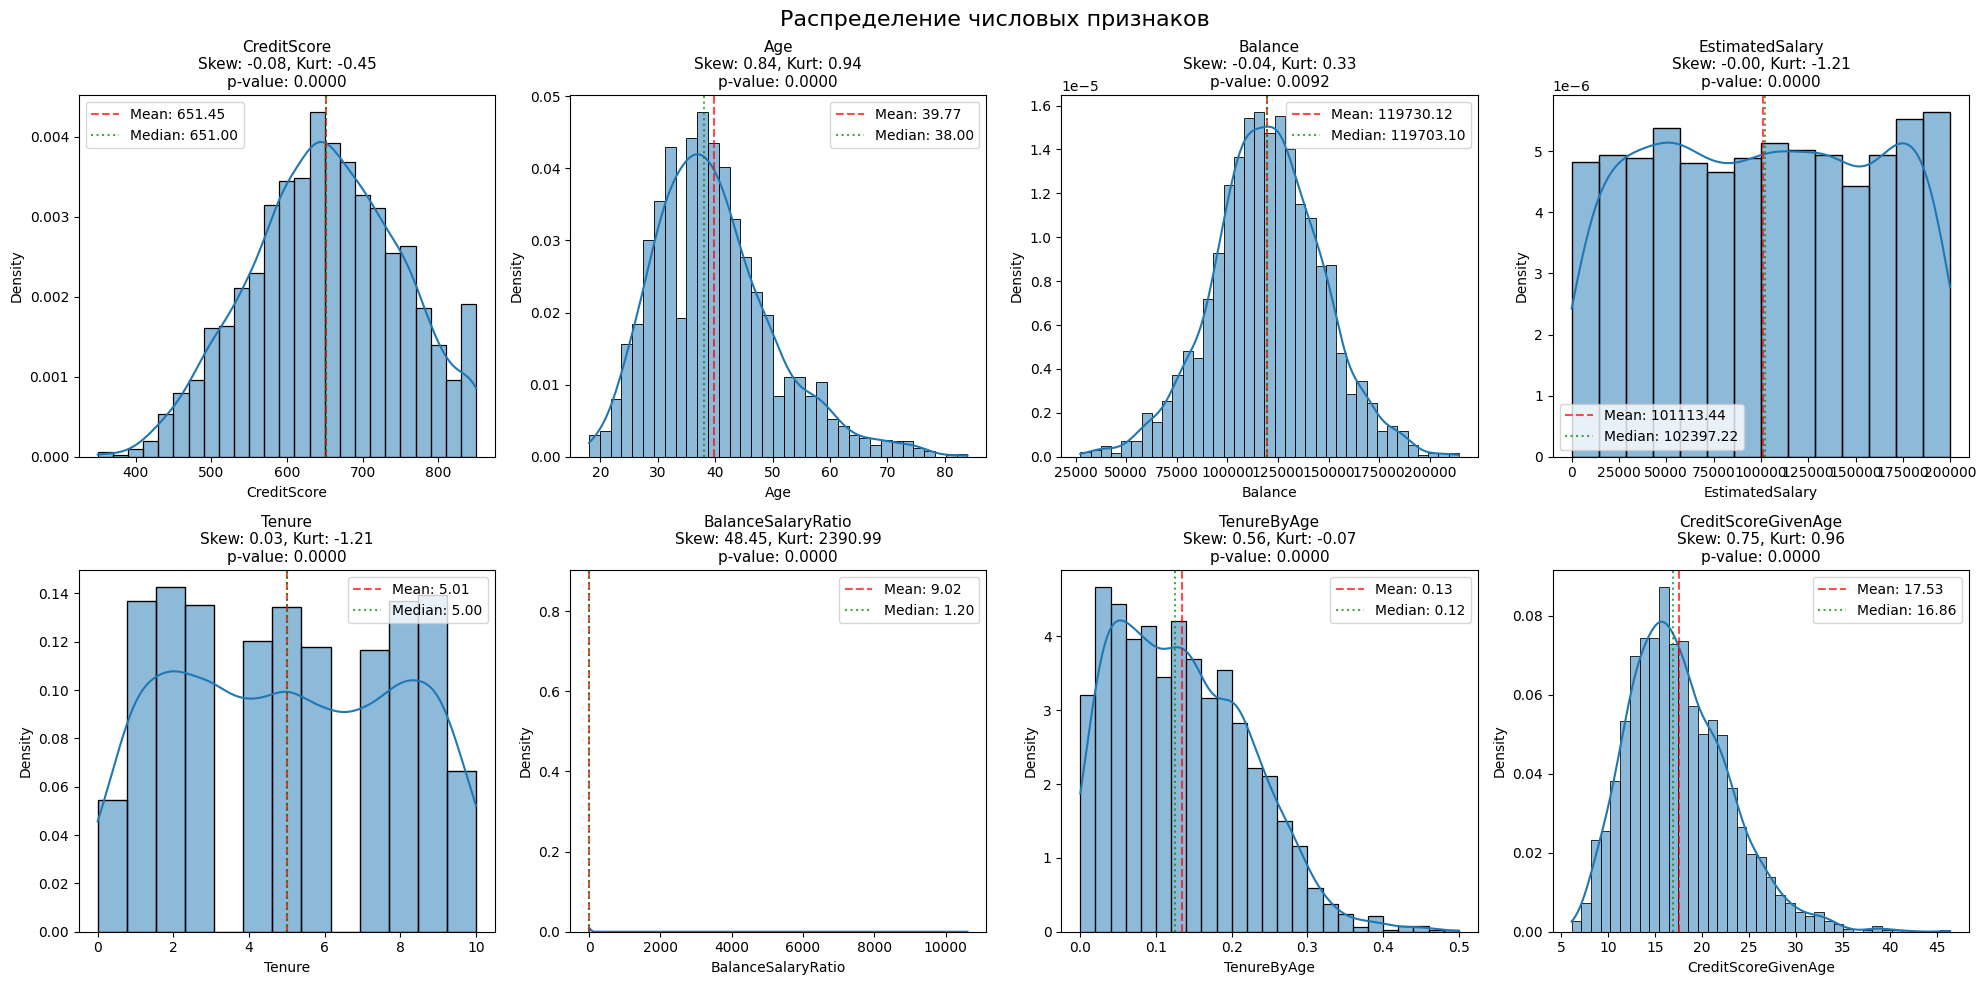


ТАБЛИЦА РЕЗУЛЬТАТОВ:
            Признак   Среднее   Медиана Стд. отклонение Skewness  Kurtosis  p-value Преобразование                                  Причина
        CreditScore    651.45    651.00           98.17  -0.0806   -0.4523 0.000000   Не требуется      Нормальное, преобразование не нужно
                Age     39.77     38.00           10.52   0.8409    0.9379 0.000000   Не требуется     Приемлемое, можно без преобразования
            Balance 119730.12 119703.10        27022.01  -0.0364    0.3268 0.009179   Не требуется      Нормальное, преобразование не нужно
    EstimatedSalary 101113.44 102397.22        58263.01  -0.0024   -1.2129 0.000000   Не требуется      Нормальное, преобразование не нужно
             Tenure      5.01      5.00            2.94   0.0309   -1.2057 0.000000   Не требуется      Нормальное, преобразование не нужно
 BalanceSalaryRatio      9.02      1.20          214.29  48.4500 2390.9869 0.000000      Требуется Сильно скошено, требуется преобразовани

In [209]:

from scipy import stats


# Функция для определения необходимости преобразования
def needs_transformation(skewness, p_value):
    """Нужно ли преобразование для логистической регрессии"""
    if abs(skewness) < 0.5:
        return False, "Нормальное, преобразование не нужно"
    elif abs(skewness) < 1.0:
        return False, "Приемлемое, можно без преобразования"
    else:
        return True, "Сильно скошено, требуется преобразование"

# Копируем данные
df = churn_data.copy()
numeric_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure',
                'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']

# Создаем список для хранения результатов
results_list = []

# Создаем графики
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(numeric_cols):  
    ax = axes[idx]
    data = df[feature].dropna()
    
    # Рассчитываем статистики
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    # Тест на нормальность (Д'Агостино K^2 тест)
    if len(data) > 8:  # Тест требует минимум 8 наблюдений
        stat, p_value = stats.normaltest(data)
        normality_text = f"p-value: {p_value:.4f}"
    else:
        p_value = np.nan
        normality_text = "Недостаточно данных для теста"
    
    # Определяем необходимость преобразования
    needs_transform, transform_reason = needs_transformation(skewness, p_value)
    
    # Гистограмма и KDE
    sns.histplot(data=data, ax=ax, kde=True, stat='density', alpha=0.5)
    
    # Заголовок
    title = f'{feature}\nSkew: {skewness:.2f}, Kurt: {kurtosis:.2f}'
    if 'normality_text' in locals():
        title += f'\n{normality_text}'
    ax.set_title(title, fontsize=11)
    
    # Вертикальные линии для среднего и медианы
    ax.axvline(data.mean(), color='red', linestyle='--', alpha=0.7, 
               label=f'Mean: {data.mean():.2f}')
    ax.axvline(data.median(), color='green', linestyle=':', alpha=0.7, 
               label=f'Median: {data.median():.2f}')
    ax.legend()
    
    # Сохраняем результаты для таблицы
    results_list.append({
        'Признак': feature,
        'Среднее': f"{data.mean():.2f}",
        'Медиана': f"{data.median():.2f}",
        'Стд. отклонение': f"{data.std():.2f}",
        'Skewness': f"{skewness:.4f}",
        'Kurtosis': f"{kurtosis:.4f}",
        'p-value': f"{p_value:.6f}" if not np.isnan(p_value) else "N/A",
        'Преобразование': 'Требуется' if needs_transform else 'Не требуется',
        'Причина': transform_reason
    })

# Скрываем лишние subplot
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Распределение числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()


# Создаем и выводим таблицу результатов
print("\n" + "="*120)
print("ТАБЛИЦА РЕЗУЛЬТАТОВ:")
print("="*120)

results_df = pd.DataFrame(results_list)
print(results_df.to_string(index=False))

# Сводная информация
total_features = len(numeric_cols)
needs_transform_count = sum(1 for item in results_list if item['Преобразование'] == 'Требуется')
normal_count = sum(1 for item in results_list if abs(float(item['Skewness'])) < 0.5)



In [210]:
# признак BalanceSalaryRatio имеет сильно скошенное распределние данных  и нужнается в обработке
df['BalanceSalaryRatio'] = np.log1p(df['BalanceSalaryRatio']+1)
#df['BalanceSalaryRatio_cbrt'] = np.cbrt(df['BalanceSalaryRatio'])
#cbrt_skew = stats.skew(df['BalanceSalaryRatio_cbrt'])
#print(f"\nКубический корень:")
#print(f"  Новая скошенность = {cbrt_skew:.4f}")
churn_data= df.copy()

Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет). 

In [211]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [212]:
y.value_counts(normalize=True)

Exited
0    0.675568
1    0.324432
Name: proportion, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**. 

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y. 

Выполним разбиение, установив значение параметра `random_state` на 0:


In [213]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 13)
Test shape: (628, 13)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [214]:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


Exited
0    0.675704
1    0.324296
Name: proportion, dtype: float64



Test :


Exited
0    0.675159
1    0.324841
Name: proportion, dtype: float64

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

### Задание 5.2 (1 балл)

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для создания одного из вариантов скейлеров для масштабирования данных;
    * приведён код для расчёта параметров трансформации (обучение скейлера) на тренировочной выборке;
    * приведён код для трансформации тренировочных и тестовых данных (признаков) в соответствии с вычисленными параметрами.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [215]:
# Ваш код здесь
# Проводим нормализацию данных  при помощи robustscaler
scaler = preprocessing.RobustScaler()
# обучаем модель на трен выборке 
scaler.fit(X_train)
# трансформация трен и тестовой выборки 
X_train_scaler= scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)


Теперь переходим к моделированию.

### Задание 5.3 (1 балл)

Для начала давайте заранее определим метрику, на которую будем ориентироваться. 

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор. 


> Укажите название метрики и обоснования своего выбора здесь

***я бы использовала метрику f-1 так как нам необходимо минимизировать и ложноположительные и ложно отрицательные срабатывания метрики,  а F1-мера как раз  используется в задачах  где необходимо балансировать между ними
Так же можно использовать все 3 метрики и найти значечение метрики которое будет оптимально для всех  3 метрик( мы можм выбрать равенсво всех  3 метрик либо максимальное значение f-1, но ремомендуется брать равенсво для удобства)***

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * выбрана верная метрика;
    * приведено развернутое обоснование выбора метрики, и приведенные рассуждения являются верными;

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

### Задание 5.4 (2 балла)

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок. 

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках. 

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

> **Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель логистической регрессии, решающая поставленную задачу;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [216]:
# Ваш код здесь
#создаем обьект логистической регрессии 
linear_model = linear_model.LogisticRegression(random_state=42)
# обучаем модель
linear_model.fit(X_train_scaler, y_train)
# делаем предсказания на тренировочной выборке  
y_train_pred = linear_model.predict(X_train_scaler)
#делаем предсказания на тестовой  выборке
y_test_pred= linear_model.predict(X_test_scaler)
# выводим результат 
print("F1-score на тренировочной выборке: {:.2f}".format(metrics.f1_score(y_train, y_train_pred)))
print("F1-score на тестовой выборке: {:.2f}".format(metrics.f1_score(y_test,y_test_pred)))

F1-score на тренировочной выборке: 0.51
F1-score на тестовой выборке: 0.50


Анализ результатов:

Отсутствие переобучения: Значения метрики F1-score на тренировочной (0.52) и тестовой (0.50) выборках практически совпадают. Это главный положительный итог — модель обобщает закономерности, а не запоминает данные.

Низкое абсолютное качество: Несмотря на корректное обучение, итоговый F1-score (~0.5) является низким для большинства практических задач, свидетельствуя о том, что модель разделяет классы ненамного лучше случайного угадывания.

Результаты feature engineering: Проведенная оптимизация данных (логарифмирование распределения целевого признака) не повлияла на качество модели, что говорит либо о недостаточности этого преобразования, либо о том, что проблема низкой предсказательной силы лежит в других областях (например, в слабой связи существующих признаков с целевой переменной).

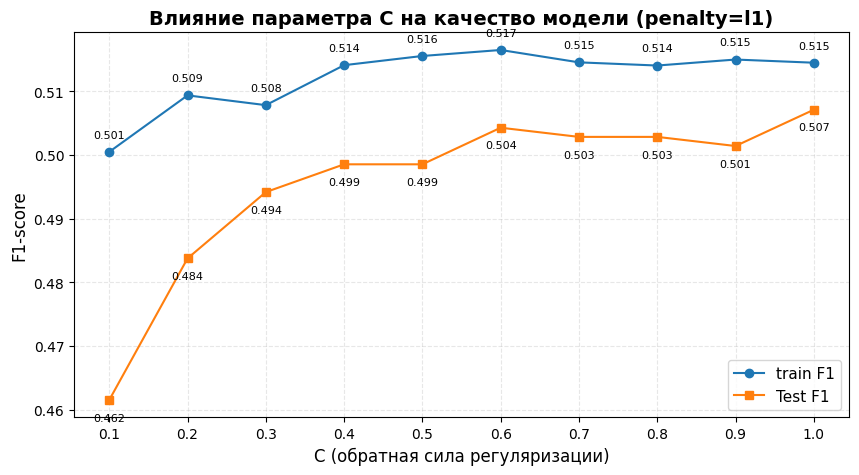

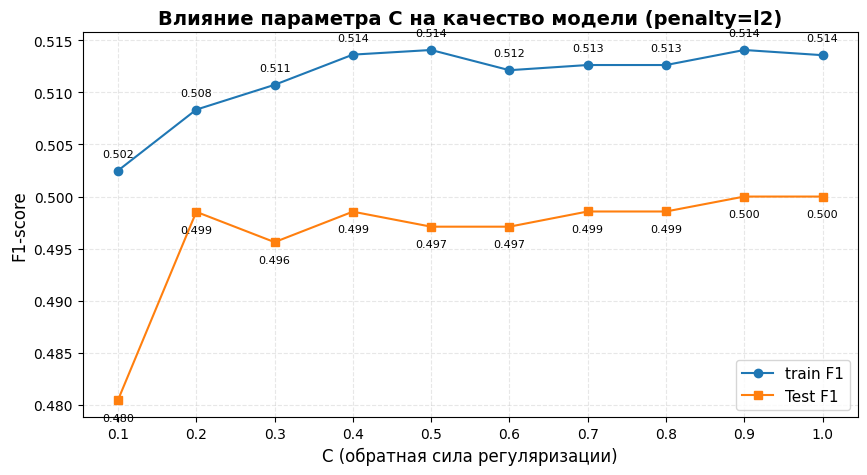


1. Результаты для penalty='l1':
  c  f1_train  f1_test
0.1    0.5005   0.4615
0.2    0.5094   0.4838
0.3    0.5078   0.4942
0.4    0.5141   0.4986
0.5    0.5156   0.4986
0.6    0.5165   0.5043
0.7    0.5146   0.5029
0.8    0.5141   0.5029
0.9    0.5150   0.5014
1.0    0.5145   0.5071

2. Результаты для penalty='l2':
  c  f1_train  f1_test
0.1    0.5025   0.4805
0.2    0.5083   0.4985
0.3    0.5107   0.4956
0.4    0.5136   0.4986
0.5    0.5141   0.4971
0.6    0.5121   0.4971
0.7    0.5126   0.4986
0.8    0.5126   0.4986
0.9    0.5141   0.5000
1.0    0.5136   0.5000


In [217]:
#дополнительное задание 
#сетка параметров для эксперементов
penalties = ['l1', 'l2']
C_values= np.arange(0.1, 1.1, 0.1).round(1).tolist()
result=[]

for penalty in penalties:
    f1_scores_train =[]
    f1_scores_test = []
    for c in C_values:
        # СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ 
        model=LogisticRegression(penalty=penalty, C=c, solver='liblinear', random_state=42, max_iter=1000)
        model.fit(X_train_scaler,y_train)
        
        #предсказание модели 
        y_train_pred=model.predict(X_train_scaler)
        y_test_pred= model.predict(X_test_scaler)
        
        # оценка качества модели  
        f1_train=metrics.f1_score(y_train,y_train_pred)
        f1_test= metrics.f1_score(y_test,y_test_pred)
        
        # сохранение результатов
        f1_scores_train.append(f1_train)
        f1_scores_test.append(f1_test)
        result.append({'penalty': penalty, 'c' : c , 'f1_train': f1_train, 'f1_test': f1_test})
        
    #визуализация для каждого  penalty  
    plt.figure(figsize=(10,5))
    plt.plot(C_values, f1_scores_train, label='train F1', marker ='o' )
    plt.plot(C_values, f1_scores_test, label='Test F1', marker='s')
    
    # Настройки графика
    plt.xlabel('C (обратная сила регуляризации)', fontsize=12)
    plt.ylabel('F1-score', fontsize=12)
    plt.title(f'Влияние параметра C на качество модели (penalty={penalty})', fontsize=14, fontweight='bold')
    
    # Устанавливаем метки на оси X для каждого значения C
    plt.xticks(C_values, [f'{c:.1f}' for c in C_values], rotation=0)
    
    # Добавляем сетку
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Добавляем легенду
    plt.legend(fontsize=11, loc='best')
    
    # Добавление аннотаций с значениями для лучшей читаемости
    for i, (train_val, test_val) in enumerate(zip(f1_scores_train, f1_scores_test)):
        plt.annotate(f'{train_val:.3f}', (C_values[i], train_val), 
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
        plt.annotate(f'{test_val:.3f}', (C_values[i], test_val), 
                    textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)
    
    plt.show()

    
#результаты в виде таблицы
results_df = pd.DataFrame(result)
# Для penalty=l1
print("\n1. Результаты для penalty='l1':")
l1_results = results_df[results_df['penalty'] == 'l1']
print(l1_results[['c', 'f1_train', 'f1_test']].round(4).to_string(index=False))

# Для penalty=l2
print("\n2. Результаты для penalty='l2':")
l2_results = results_df[results_df['penalty'] == 'l2']
print(l2_results[['c', 'f1_train', 'f1_test']].round(4).to_string(index=False))




> Ваши выводы и рассуждения — *здесь*.

***Логарифмирование признака дало значимый положительный эффект при использовании l1 и l2 регуляризации:\
L1-регуляризация стала предпочтительнее L2 (0.5071 vs 0.5000)\
Лучшая модель (L1, C=1.0) показывает хороший баланс между обучением и обобщением (разрыв train/test всего 0.0074)\
Преодолён психологический барьер 0.5 — модель теперь стабильно лучше случайного угадывания***

### Задание 5.5 (2 балла)

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * сгенерированы полиномиальные признаки третьей степени;
    * построена модель логистической регрессии, решающая поставленную задачу на основе сгенерированных признаков;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [218]:
# создаем генератор случайных  чисел 
poly= preprocessing.PolynomialFeatures(include_bias=False,degree=3)
poly.fit(X_train)
# генерируем полиномиальные признаки для тренирововчной выборки
X_train_scaler_poly= poly.transform(X_train_scaler)
# генерирует полиномиальные признаки для тестовой выборки
X_test_scaler_poly = poly.transform(X_test_scaler)

# выводим результаты размерности 
print(X_train_scaler_poly.shape)
print(X_test_scaler_poly.shape)

(1881, 559)
(628, 559)


In [ ]:
# создаем обьект класса логистическая регресиия с полимиальными признаками
linear_model_poly = LogisticRegression(random_state=42)
# Обучаем модель
linear_model_poly.fit(X_train_scaler_poly, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


> Ваши выводы и рассуждения — *здесь*

In [220]:
# делаем предсказания для тренировочной выборки
y_train_pred_poly= linear_model_poly.predict(X_train_scaler_poly)
#делаем предсказания для тестовой выборки
y_test_pred_poly= linear_model_poly.predict(X_test_scaler_poly)
#выводим результат о метриках
print("F1-score на тренировочной выборке: {:.2f}".format(metrics.f1_score(y_train, y_train_pred_poly)))
print("F1-score на тестовой выборке: {:.2f}".format(metrics.f1_score(y_test,y_test_pred_poly)))

F1-score на тренировочной выборке: 0.75
F1-score на тестовой выборке: 0.65


***Результат стал значительно выше, чем при работе не с полиномиальными признаками,  модель стала лучше предсказывать уход клиентов из  банка***

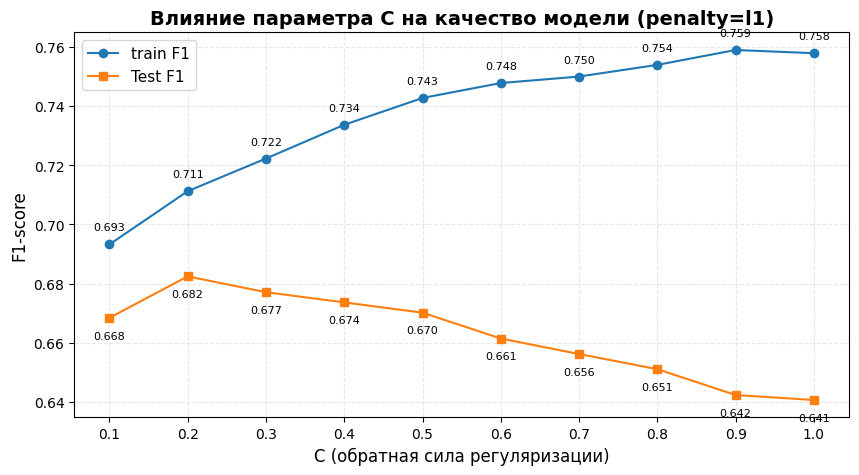

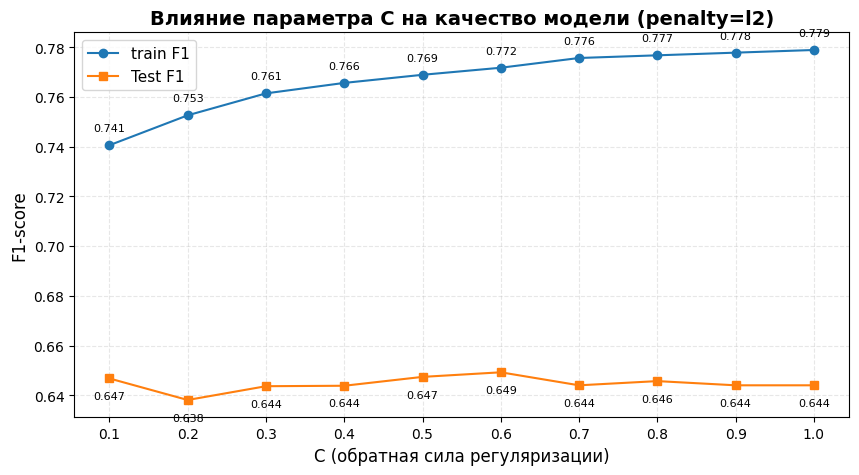


1. Результаты для penalty='l1':
  c  f1_train  f1_test
0.1    0.6932   0.6684
0.2    0.7112   0.6824
0.3    0.7223   0.6771
0.4    0.7337   0.6736
0.5    0.7428   0.6702
0.6    0.7478   0.6614
0.7    0.7500   0.6562
0.8    0.7540   0.6510
0.9    0.7590   0.6423
1.0    0.7579   0.6406

2. Результаты для penalty='l2':
  c  f1_train  f1_test
0.1    0.7406   0.6467
0.2    0.7527   0.6381
0.3    0.7615   0.6436
0.4    0.7657   0.6438
0.5    0.7690   0.6474
0.6    0.7718   0.6492
0.7    0.7757   0.6440
0.8    0.7768   0.6457
0.9    0.7779   0.6440
1.0    0.7789   0.6440


In [221]:
#дополнительное задание 
#сетка параметров для эксперементов
penalties = ['l1', 'l2']
C_values= np.arange(0.1, 1.1, 0.1).round(1).tolist()
result=[]

for penalty in penalties:
    f1_scores_train =[]
    f1_scores_test = []
    for c in C_values:
        # СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ 
        model=LogisticRegression(penalty=penalty, C=c, solver='liblinear', random_state=42, max_iter=1000)
        model.fit(X_train_scaler_poly,y_train)
   
        #предсказание модели 
        y_train_pred_poly=model.predict(X_train_scaler_poly)
        y_test_pred_poly= model.predict(X_test_scaler_poly)

        # оценка качества модели  
        f1_train=metrics.f1_score(y_train,y_train_pred_poly)
        f1_test= metrics.f1_score(y_test,y_test_pred_poly)
        
        # сохранение результатов
        f1_scores_train.append(f1_train)
        f1_scores_test.append(f1_test)
        result.append({'penalty': penalty, 'c' : c , 'f1_train': f1_train, 'f1_test': f1_test})
        
    #визуализация для каждого  penalty  
    plt.figure(figsize=(10,5))
    plt.plot(C_values, f1_scores_train, label='train F1', marker ='o' )
    plt.plot(C_values, f1_scores_test, label='Test F1', marker='s')
    
    # Настройки графика
    plt.xlabel('C (обратная сила регуляризации)', fontsize=12)
    plt.ylabel('F1-score', fontsize=12)
    plt.title(f'Влияние параметра C на качество модели (penalty={penalty})', fontsize=14, fontweight='bold')
    
    # Устанавливаем метки на оси X для каждого значения C
    plt.xticks(C_values, [f'{c:.1f}' for c in C_values], rotation=0)
    
    # Добавляем сетку
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Добавляем легенду
    plt.legend(fontsize=11, loc='best')
    
    # Добавление аннотаций с значениями для лучшей читаемости
    for i, (train_val, test_val) in enumerate(zip(f1_scores_train, f1_scores_test)):
        plt.annotate(f'{train_val:.3f}', (C_values[i], train_val), 
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
        plt.annotate(f'{test_val:.3f}', (C_values[i], test_val), 
                    textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)
    
    plt.show()

    
#результаты в виде таблицы
results_df = pd.DataFrame(result)
# Для penalty=l1
print("\n1. Результаты для penalty='l1':")
l1_results = results_df[results_df['penalty'] == 'l1']
print(l1_results[['c', 'f1_train', 'f1_test']].round(4).to_string(index=False))

# Для penalty=l2
print("\n2. Результаты для penalty='l2':")
l2_results = results_df[results_df['penalty'] == 'l2']
print(l2_results[['c', 'f1_train', 'f1_test']].round(4).to_string(index=False))




***3. Оптимальные параметры (по тестовой выборке)***

- Лучшая модель: L1 с C=0.2 → F1-test = 0.6824
- Второй лучший: L1 с C=0.1 → F1-test = 0.6684
- L2 показывает худшие результаты на тесте (максимум 0.6492)
-  При оспользовании L1, достигнуто существенное улучшение: F1 вырос с 0.50 до 0.68
-  Найдена оптимальная конфигурация: L1 с C=0.1-0.2
-  Модель имеет практическую ценность: F1=0.68 уже можно использовать
-  L1 регуляризация эффективна: лучше справляется с переобучением

### Задание 5.6. (2 балла)


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках. 

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для построения графика зависимости значения выбранной метрики от порога вероятности;
    * найден оптимальный порог вероятности, на котором достигается наибольшее значение выбранной метрики на тестовой выборке;
    * на основе найденного порога вероятности построено предсказание модели для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

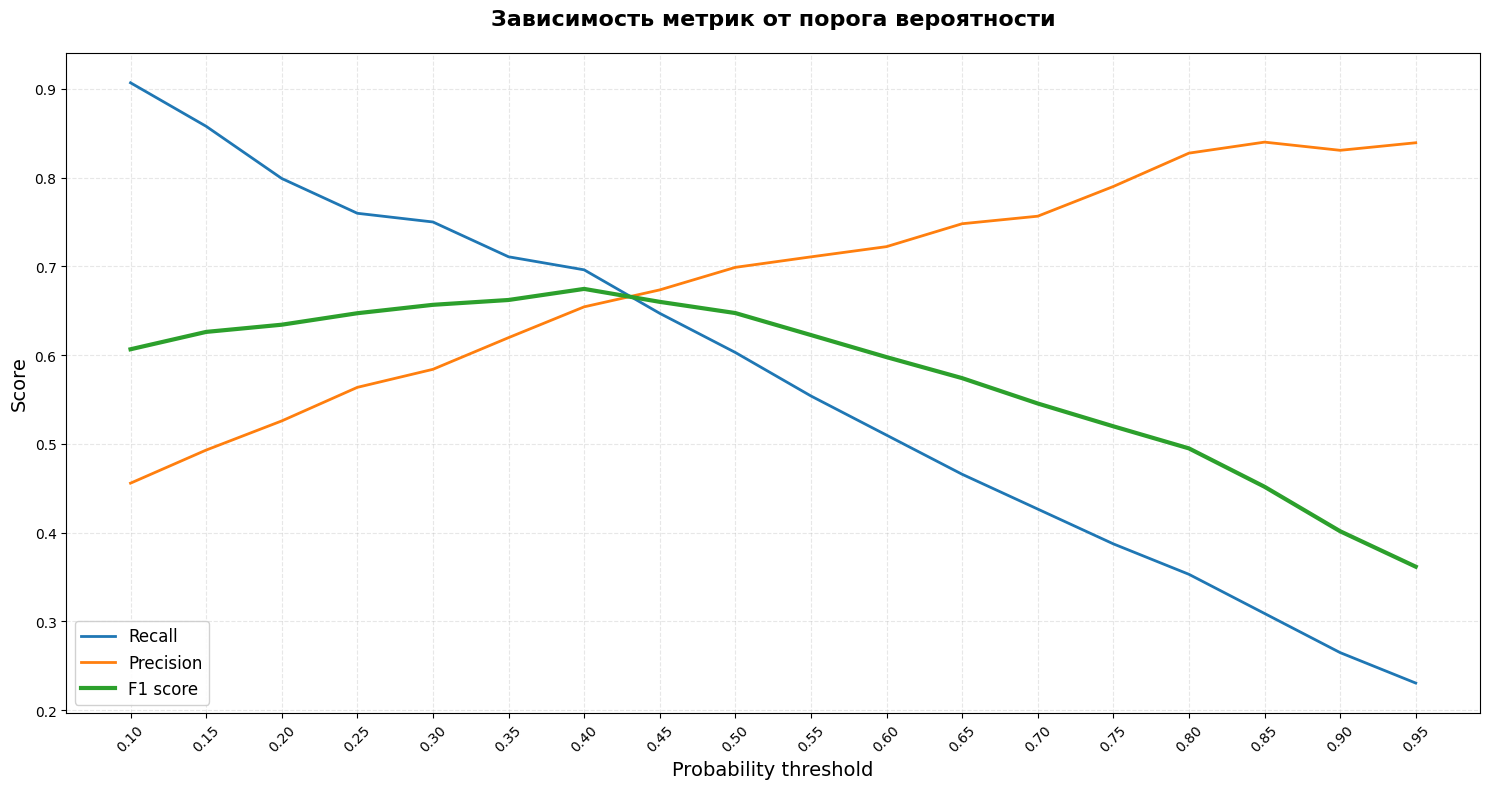

In [222]:
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(linear_model_poly.predict_proba(X_test_scaler_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
recall_scores= []
precition_scored=[]
f1_scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    recall_scores.append(metrics.recall_score(y_test, y_test_pred_poly))
    precition_scored.append(metrics.precision_score(y_test, y_test_pred_poly))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred_poly))
    

# визуализируем результат 
fig, ax = plt.subplots(figsize=(15, 8))
# строим линейный график зависимости scores от threshold
ax.plot(thresholds, recall_scores, label='Recall', linewidth=2)
ax.plot(thresholds, precition_scored, label='Precision', linewidth=2)
ax.plot(thresholds, f1_scores, label='F1 score', linewidth=3)

# название графика и осей 
ax.set_title('Зависимость метрик от порога вероятности', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Probability threshold', fontsize=14)
ax.set_ylabel('Score', fontsize=14)

# Устанавливаем метки на оси X для каждого значения порога
ax.set_xticks(thresholds)  # Указываем позиции тиков
ax.set_xticklabels([f'{t:.2f}' for t in thresholds], rotation=45, fontsize=10)  # Форматируем метки

# Добавляем сетку
ax.grid(True, alpha=0.3, linestyle='--', which='both')

# Настраиваем отступы
plt.tight_layout()

ax.legend(fontsize=12, loc='best', framealpha=0.9)


In [223]:
#оптимальный порог вероятности это 0.4 ( достигается пик F1),  но на уроках советовали брать значение равное во всех точках, и это примерно 0.43 
# я попробую оба порога вероятности 
threshold_opt= 0.4
y_test_proba_pred = y_test_proba_pred.apply(lambda x: 1 if x> threshold_opt else 0)
# считаем метрики
print(metrics.classification_report(y_test, y_test_proba_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       424
           1       0.65      0.70      0.67       204

    accuracy                           0.78       628
   macro avg       0.75      0.76      0.76       628
weighted avg       0.79      0.78      0.78       628



In [224]:
threshold_opt_1= 0.43
y_test_proba_pred_1 = y_test_proba_pred.apply(lambda x: 1 if x> threshold_opt else 0)
# считаем метрики
print(metrics.classification_report(y_test, y_test_proba_pred_1))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       424
           1       0.65      0.70      0.67       204

    accuracy                           0.78       628
   macro avg       0.75      0.76      0.76       628
weighted avg       0.79      0.78      0.78       628



***при изменении порога вероятности данные метрик не изменились. 
Так же можно сделать вывод , что модель стала чуть лучше предсказывать уход клиентов,  но так же стоит заметить,что класс 0 нам легче определить , те тех  кто остается чем тех кто уходит. 
так же видим что разница между данными не большая, что говорит о том что переобучения пока нет***

## Практика: деревья решений и случайный лес

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [225]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 13)
Test shape: (628, 13)


Импортируем необходимые для выполнения практики модули:

In [226]:
from sklearn import tree
from sklearn import ensemble

Приступим! Выполните задания 8.1–8.4.

### Задание 8.1. (2 балла)

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию. 

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42). 

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос, а также обоснование полученного результата.

- Задание выполнено верно, но не приведено обоснование полученного результата или обоснование является некорректным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [227]:
# Ваш код здесь
#создаем обьект класса DecisionTreeClassifier
dt_clt_model= tree.DecisionTreeClassifier(random_state=42, criterion='entropy')
#обучаем модель
dt_clt_model.fit(X_train, y_train)
#делаем предсказания на тренировочной выборке
y_train_pred= dt_clt_model.predict(X_train)
print('F1 Score for Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#делаем предсказания на тестовой выборке
y_test_pred= dt_clt_model.predict(X_test)
print('F1 Score for Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))



F1 Score for Train: 1.00
F1 Score for Test: 0.57


> Ваши выводы и рассуждения — *здесь*

***Полученная модель можно считать переобученной,  по причине того, что значения F1_score  на тренировочной выборке равны 1,  а на тестовой 0,57. Разница в 0.43 пункта свидетельствует о серьезном переобучении.***

***Если мы запустим дерево,  то увидим,  что модель задает огромное кол-во вопросов и таким образом подстраивается под модель,  чтобы предсказать точный отток клиентов банка***

### Задание 8.2. (1 балл)

Давайте «подстрижём» наше дерево. 

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балла**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [228]:

# Ваш код здесь
#создаем обьект класса DecisionTreeClassifier
dt_clt_model_2= tree.DecisionTreeClassifier(random_state=42,
                                          max_depth=8, 
                                          criterion='entropy',
                                          min_samples_leaf=10
                                          )
#обучаем модель
dt_clt_model_2.fit(X_train, y_train)

#делаем предсказания на тренировочной выборке
y_train_pred= dt_clt_model_2.predict(X_train)
print('F1 Score for Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#делаем предсказания на тестовой выборке
y_test_pred= dt_clt_model_2.predict(X_test)
print('F1 Score for Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))



F1 Score for Train: 0.72
F1 Score for Test: 0.64


> ***Ваши выводы и рассуждения — *здесь****
1. Улучшение обобщающей способности:
- F1-score на тестовой выборке вырос с 0.57 до 0.64 (улучшение на 0.07)
- Модель стала лучше работать на новых данных
2. Снижение переобучения:
- F1-score на тренировочной выборке снизился с 1.00 до 0.72
- Разрыв между тренировочной и тестовой выборками сократился с 0.43 до 0.08 указывает на то, что модель теперь лучше обобщает закономерности
3. Качество модели:
- Модель показывает сходные результаты на обеих выборках
- Небольшой разрыв (0.08) является нормальным и ожидаемым
- Модель достигла баланса между сложностью и обобщающей способностью

### Задание 8.3. (1 балл)

Давайте воспользуемся случайным лесом. 

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [229]:
# Ваш код здесь
#создаем обьект класса RandomForestClassifier
rn_clf_model= ensemble.RandomForestClassifier(n_estimators=500,
                                              max_depth=8,
                                              min_samples_leaf=10,
                                              criterion='entropy',
                                              random_state=42)

#обучаем модель
rn_clf_model.fit(X_train, y_train)

#делаем предсказания на тренировочной выборке
y_train_pred= rn_clf_model.predict(X_train)
print('F1 Score for Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#делаем предсказания на тестовой выборке
y_test_pred= rn_clf_model.predict(X_test)
print('F1 Score for Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

F1 Score for Train: 0.73
F1 Score for Test: 0.64


> Ваши выводы и рассуждения — *здесь*

***Random Forest показал практически идентичные результаты дереву решений с регуляризацией.Тестовый F1-score остался на уровне 0.64
Возможно необходимо подобрать другие параметры random forest***

### Задание 8.4. (2 балла)

Мы на финишной прямой. 


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список. 

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее. 

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

> **Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

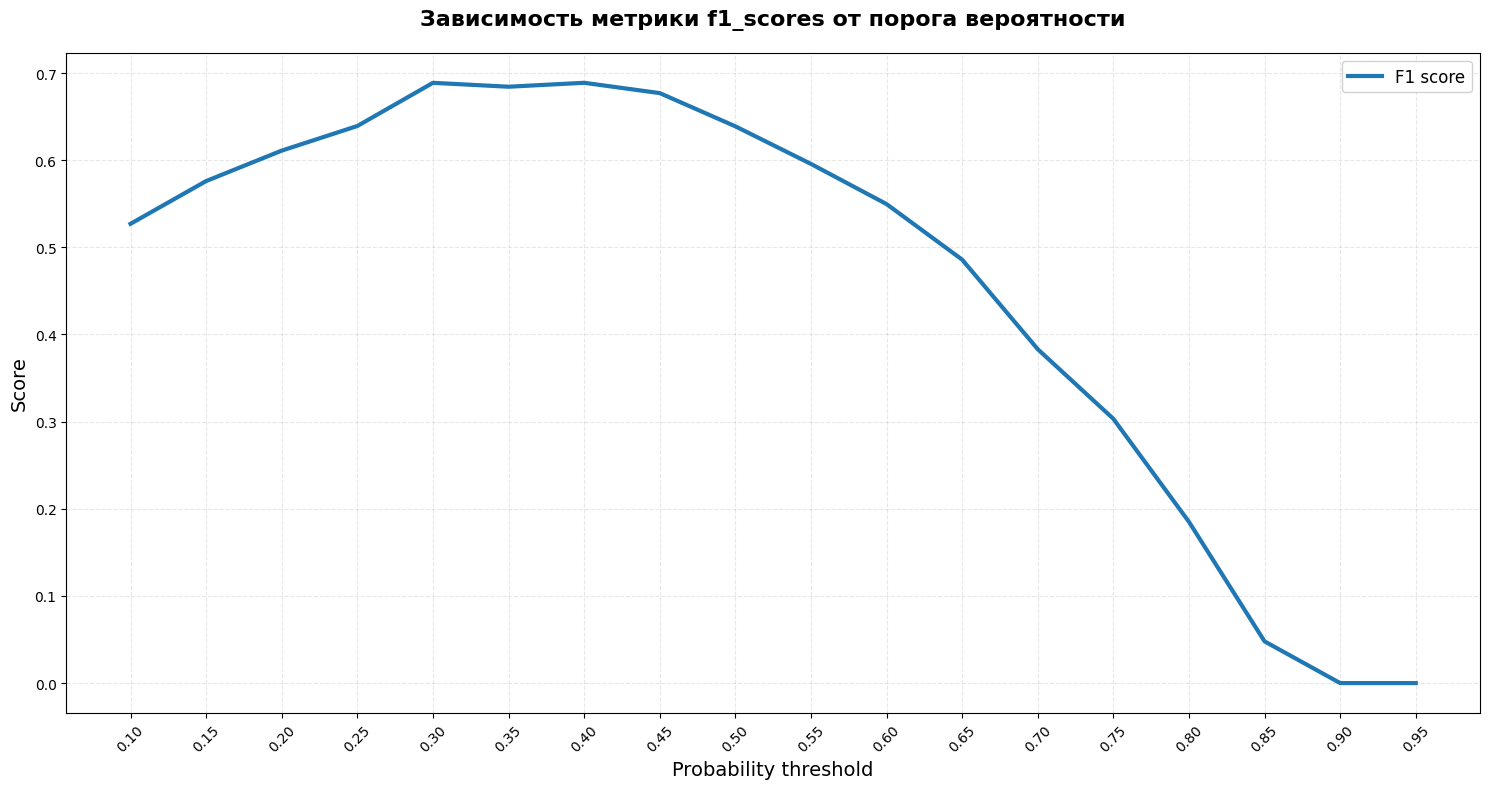

In [230]:
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(rn_clf_model.predict_proba(X_test)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
f1_scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику и добавляем результат в список
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))


# визуализируем результат 
fig, ax = plt.subplots(figsize=(15, 8))
# строим линейный график зависимости scores от threshold

ax.plot(thresholds, f1_scores, label='F1 score', linewidth=3)

# название графика и осей 
ax.set_title('Зависимость метрики f1_scores от порога вероятности', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Probability threshold', fontsize=14)
ax.set_ylabel('Score', fontsize=14)

# Устанавливаем метки на оси X для каждого значения порога
ax.set_xticks(thresholds)  # Указываем позиции тиков
ax.set_xticklabels([f'{t:.2f}' for t in thresholds], rotation=45, fontsize=10)  # Форматируем метки

# Добавляем сетку
ax.grid(True, alpha=0.3, linestyle='--', which='both')

# Настраиваем отступы
plt.tight_layout()

ax.legend(fontsize=12, loc='best', framealpha=0.9)


In [233]:
#оптимальный порог вероятности это 0.3 либо  0.4 ( достигается пик F1),  
threshold_opt= 0.3
# людей,  у которых вероятность оттока больше 0,4 относим к классу 1 
# в противном случае к классу 0
y_test_proba_pred = y_test_proba_pred.apply(lambda x: 1 if x> threshold_opt else 0)
# считаем метрики
print('F1 scores test: {:.3f}'.format(metrics.f1_score(y_test, y_test_proba_pred)))

F1 scores test: 0.689


> Ваши выводы и рассуждения — *здесь*

***Увеличение значений метрик с 0.64 до 0.69,  это значительное улучшение качества модели. Для некоторых  бизнес задач такой прирост может быть критически важным***
***Общий ВЫВОД***

Все модели показывают умеренное качество (F1-score на тесте: 0.50-0.69), что указывает на сложность задачи или недостаточность признаков для эффективного предсказания. Наилучший результат (F1=0.689) достигнут с помощью RandomForest с оптимизированным порогом классификации.

*Анализ отдельных моделей*
- Linear Regression (без полиномиальных признаков), F1: 0.50/0.51 - практически одинаковые результаты на train/test -  модель сильно переобучена, линейные признаки недостаточно описывают данные
- Linear Regression (с полиномиальными признаками), F1: 0.75/0.65 - значительный рост качества, Полиномиальные признаки существенно улучшают предсказательную способность модели
- Decision Tree (без ограничений), F1: 1.00/0.57 - классический пример сильного переобучения, дерево выучило тренировочные данные "наизусть". Такая модель бесполезна на практике
- Decision Tree (с регуляризацией), F1: 0.72/0.64 - существенное улучшение, параметры max_depth=8 и min_samples_leaf=10 эффективно борются с переобучением,  модель можно считать сбалансированной с приемлемым качеством
- Random Forest, F1: 0.73/0.64 - аналогично Decision Tree с регуляризацией (с увеличением тренировочной выборки на 0,01)
- Наилучший результат показал Random forest F1_scores с threshold=0.3: 0.689 

Ансамбль не дал значительного прироста над одним деревом\
Оптимизация порога классификации (0.3 вместо 0.5) улучшила F1 на 0.05\
Это может говорить о несбалансированности классов в данных


### Задание 8.5. (1 балл)

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

> **Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки; 
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * сформирован DataFrame на основе предоставленного словаря;
    * произведены преобразования данных, необходимые для работы модели;
    * предсказана вероятность оттока клиента (вероятность принадлежности к классу 1).

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [232]:
# Ваш код здесь
df_new_client = pd.DataFrame({
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
})
# бинарное кодирование категориальных  признаков 
df_new_client = pd.get_dummies(df_new_client)
# создание новых  признаков 
df_new_client['BalanceSalaryRatio']= df_new_client['Balance'] / df_new_client['EstimatedSalary']
df_new_client['TenureByAge'] = df_new_client['Tenure'] / df_new_client['Age']
df_new_client['CreditScoreGivenAge'] = df_balance_high['CreditScore'] / df_balance_high['Age']
#создание нового признака Gender_Female,  так как его нет в DF с новым клиентом 
if 'Gender_Female' not in df_new_client.columns:
    df_new_client['Gender_Female'] = 0
# Выравнивание колонок с моделью
df_new_client = df_new_client.reindex(columns=X_train.columns, fill_value=0)


# Предсказание
vasily_proba = rn_clf_model.predict_proba(df_new_client)[0, 1]

optimal_threshold = 0.4  # порог вероятности найдеенный ранее 

# людей,  у которых вероятность оттока больше 0,4 относим к классу 1 
# в противном случае к классу 0
vasily_prediction = 1 if vasily_proba > optimal_threshold else 0
print(f"Вероятность оттока Василия (принадлежность к классу 1): {vasily_proba:.3f}")


Вероятность оттока Василия (принадлежность к классу 1): 0.446
